# 記述統計

In [1]:
# ライブラリのインストール
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

/var/folders/q5/s5mcbmt95hd29sp3b9xmr2580000gn/T/ipykernel_64422/2309575592.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# 使用するデータのロード
df = sns.load_dataset("tips")
df["tip_rate"] = df["tip"] / df["total_bill"]  ## 支払に対するチップの割合
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


## 分布
* どの値にどのくらいデータが存在するか
  * 連続変数の場合は、ヒストグラムを使う
  * カテゴリ変数の場合は、棒グラフを使う

### ヒストグラム
sns.displot()

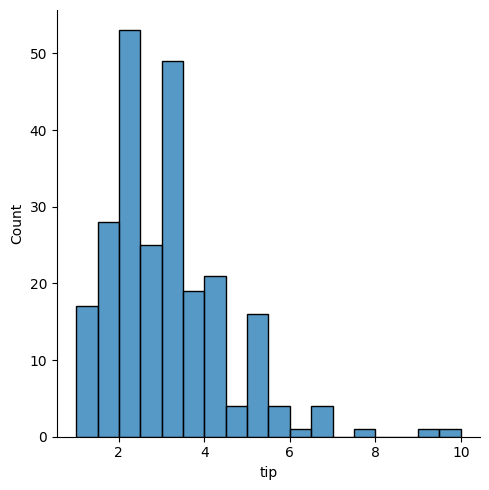

In [4]:
sns.displot(df["tip"])

### 棒グラフ
sns.catplot(x, data, kind="count")

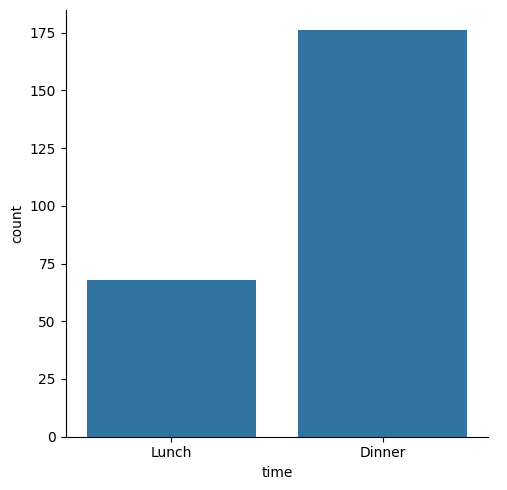

In [5]:
sns.catplot(x="time", data=df, kind="count")

## 代表値
* 平均(mean)
* 中央値(median)
* 最頻値(mode)

### 平均値
* 平均値の特徴
  * **平均からの差(偏差(deviation))の合計は0**
  * **平均値は、各値からの差の2乗の合計(平方和)を最小にする**
* 平均値の算出
  * np.mean()
  * df["column"].mean()
  * df.groupby("column").mean()

In [7]:
# 平均値
np.mean(df["tip_rate"])

0.16080258172250472

In [8]:
df["tip_rate"].mean()

0.16080258172250472

In [16]:
df.groupby("sex").mean(numeric_only=True)

/var/folders/q5/s5mcbmt95hd29sp3b9xmr2580000gn/T/ipykernel_549/2199818090.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("sex").mean(numeric_only=True)


,total_bill,tip,size,tip_rate
sex,,,,
Male,20.744076,3.089618,2.630573,0.157651
Female,18.056897,2.833448,2.459770,0.166491


/var/folders/q5/s5mcbmt95hd29sp3b9xmr2580000gn/T/ipykernel_549/3213116755.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="sex", y="tip_rate", data=df, ci=None)  ## ci: credible interval(信頼区間)


<Axes: xlabel='sex', ylabel='tip_rate'>

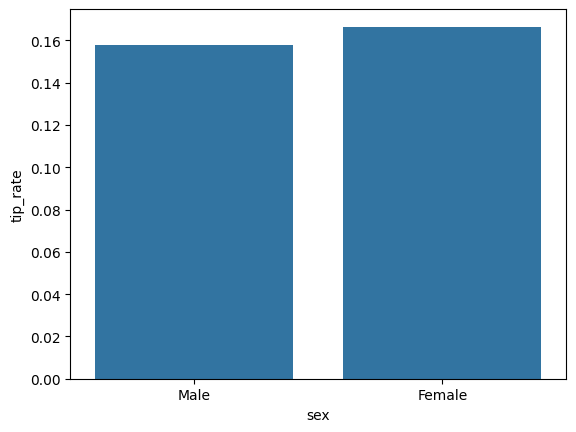

In [18]:
sns.barplot(x="sex", y="tip_rate", data=df, ci=None)  ## ci: credible interval(信頼区間)

### 中央値
* 中央値の特徴
  * 平均値より外れ値の影響を受けにくい
  * 真ん中の値がない場合は、真ん中の2つの中間をとる
  * 平均値の計算より時間がかかることに注意(ソートがあるため)
* 中央値の算出
  * np.median()
  * df["column"].median()
  * df.groupby("column").median(numeric_only=True)

In [3]:
# 中央値
np.median(df["tip_rate"])

0.15476977125802577

In [4]:
df["tip_rate"].median()

0.15476977125802577

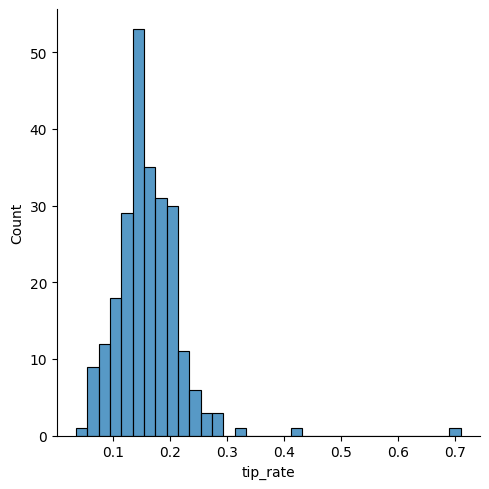

In [5]:
sns.displot(df["tip_rate"])

In [7]:
df.groupby("sex").median(numeric_only=True)

/var/folders/q5/s5mcbmt95hd29sp3b9xmr2580000gn/T/ipykernel_14752/2454756599.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("sex").median(numeric_only=True)


,total_bill,tip,size,tip_rate
sex,,,,
Male,18.35,3.00,2.0,0.153492
Female,16.40,2.75,2.0,0.155581


/var/folders/q5/s5mcbmt95hd29sp3b9xmr2580000gn/T/ipykernel_14752/3975821763.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="sex", y="tip_rate", data=df, estimator=np.median, ci=None)  ## ci: credible interval(信頼区間)


<Axes: xlabel='sex', ylabel='tip_rate'>

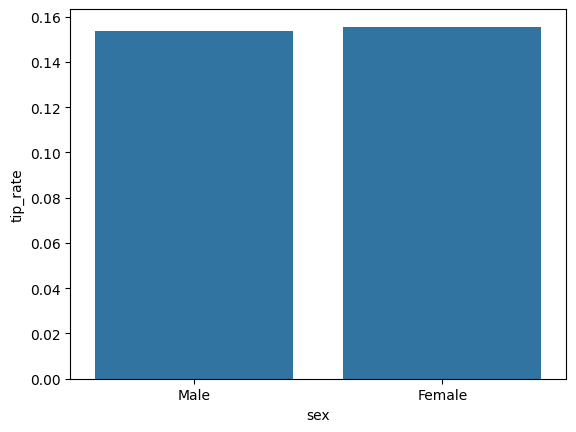

In [6]:
sns.barplot(
    x="sex", y="tip_rate", data=df, estimator=np.median, ci=None
)  ## ci: credible interval(信頼区間)

In [8]:
df.sort_values("tip_rate", ascending=False)

,total_bill,tip,sex,smoker,day,time,size,tip_rate
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
...,...,...,...,...,...,...,...,...
187,30.46,2.00,Male,Yes,Sun,Dinner,5,0.065660
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
57,26.41,1.50,Female,No,Sat,Dinner,2,0.056797
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.056433


### 最頻値
* 最頻値の特徴
  * 極端に特定の値に集中している場合、最頻値を代表値として使う
  * 分布の山をモーダル(modal)と呼ぶ
* 最頻値の算出
  * stats.mode()
  * df["column"].mode()

In [10]:
# 最頻値
stats.mode([1, 2, 2, 2, 3, 4])

ModeResult(mode=2, count=3)

In [11]:
mode, count = stats.mode([1, 2, 2, 2, 3, 4])
print(mode, count)

2 3


In [13]:
df["size"].mode()

0    2
Name: size, dtype: int64

## 散布度
* データのばらつきを表したい
  * 範囲(range)
  * 四分位数(quartile)
  * 平均偏差(MD)
  * 分散(variance)
  * 標準偏差(standard deviation)

### 範囲
* 最大値 - 最小値
* 外れ値に弱い
* 全体のばらつき度を示すには不十分
  * →最小、最大以外のものを使おう

In [14]:
# 範囲
np.min(df["tip"])

1.0

In [15]:
df["tip"].min()

1.0

In [18]:
df.groupby("sex").min(numeric_only=True)

/var/folders/q5/s5mcbmt95hd29sp3b9xmr2580000gn/T/ipykernel_14752/3941874566.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("sex").min(numeric_only=True)


,total_bill,tip,size,tip_rate
sex,,,,
Male,7.25,1.0,1,0.035638
Female,3.07,1.0,1,0.056433


### 四分位数
* 四分位数の特徴
  * データを並べて四分割した時の25%, 50%, 75%の値
  * "範囲"よりは外れ値に強い
    * 全体のばらつき度を示すにはまだ不十分
* 四分位数の算出
  * np.quantile(data, [0.25, 0.5, 0.75])
  * df["column"].quantile([0.25, 0.5, 0.75])

In [21]:
np.quantile(df["tip_rate"], [0.25, 0.5, 0.75])

array([0.12912736, 0.15476977, 0.19147549])

In [20]:
df["tip_rate"].quantile([0.25, 0.5, 0.75])

0.25    0.129127
0.50    0.154770
0.75    0.191475
Name: tip_rate, dtype: float64

In [22]:
# 四分位範囲(IQR)
stats.iqr(df["tip_rate"])

0.06234812458689151

<Axes: >

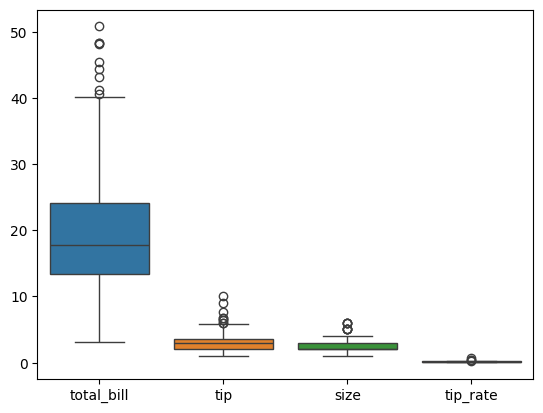

In [23]:
sns.boxplot(df)

<Axes: xlabel='sex', ylabel='tip_rate'>

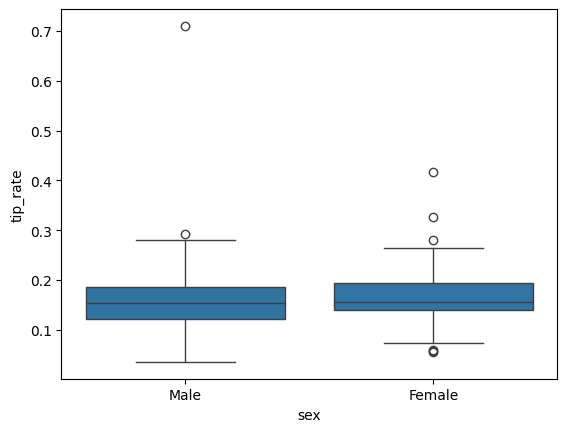

In [25]:
sns.boxplot(x="sex", y="tip_rate", data=df)

### 平均偏差
* 平均偏差の特徴
  * 平均(もしくは中央値)からの偏差の絶対値の平均
  * すべてのデータを使うので、範囲や四分位数より散布度としては適している
  * 絶対値が扱いにくい
    * 絶対値が扱いにくいので2乗する　→　分散を使う

### 分散(variance)
* 分散の特徴
  * 平均からの偏差(各データとの差)の2乗の平均
  * すべてのデータを使うので、範囲や四分位数より散布度としては適している
  * nではなくn-1で割る不偏分散もよく使われる
  * 2乗するため尺度がずれてしまうのが問題　→ 平方根をとる(標準偏差)
* 分散の算出
  * np.var()

In [26]:
np.var(df["tip_rate"])

0.00371452800135469

### 標準偏差(standard deviation)
* 標準偏差の特徴
  * 平均からの偏差(各データとの差)の2乗の平方根　→ 分散の平方根
  * すべてのデータを使うので、範囲や四分位数より散布度としては適している
* 標準偏差の算出
  * np.std()

In [27]:
np.std(df["tip_rate"])

0.060946927743362835

## 2変数間の記述統計

### 共分散(covariance)
* 2変数間の相関関係を表す指標
* 共分散の算出
  * np.cov(xarray, yarray, bias=True)
  * np.cov(array, bias=True)

In [3]:
np.cov(
    [1, 2, 3], [-4, 5, 16], bias=True
)  # bias=Trueは、nで割ったもの。つけないと不偏分散となる

array([[ 0.66666667,  6.66666667],
       [ 6.66666667, 66.88888889]])

In [5]:
np.cov(df["total_bill"], df["tip"], bias=True)

array([[78.92813149,  8.28938892],
       [ 8.28938892,  1.90660851]])

In [8]:
x = np.stack([df["total_bill"], df["tip"], df["size"]], axis=0)
x.shape

(3, 244)

In [9]:
np.cov(x, bias=True)

array([[78.92813149,  8.28938892,  5.04522121],
       [ 8.28938892,  1.90660851,  0.64126747],
       [ 5.04522121,  0.64126747,  0.9008835 ]])

In [14]:
df.select_dtypes(include=["number"]).cov()

,total_bill,tip,size,tip_rate
total_bill,79.252939,8.323502,5.065983,-0.184107
tip,8.323502,1.914455,0.643906,0.028931
size,5.065983,0.643906,0.904591,-0.008298
tip_rate,-0.184107,0.028931,-0.008298,0.003730


In [10]:
# あるいは、下記の書き方
df.cov(numeric_only=True)

,total_bill,tip,size,tip_rate
total_bill,79.252939,8.323502,5.065983,-0.184107
tip,8.323502,1.914455,0.643906,0.028931
size,5.065983,0.643906,0.904591,-0.008298
tip_rate,-0.184107,0.028931,-0.008298,0.003730


### 相関係数(correlation coefficient)
* 相関係数の特徴
  * 共分散を標準化した値
  * 共分散の取りうる値(最小値〜最大値)を計算し、-1〜1の範囲にすることを考える
* 相関行列の算出
  * np.corrcoef(xarray, yarray)
  * np.corrcoef(array)
  * df.corr()
* 相関行列の描画
  * sns.heatmap(df.corr())

In [4]:
np.corrcoef([1, 4, 5], [5, 6, 8])

array([[1.        , 0.89104211],
       [0.89104211, 1.        ]])

In [5]:
np.corrcoef(df["total_bill"], df["tip"])

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

In [6]:
x = np.stack([df["total_bill"], df["tip"], df["size"]], axis=0)
np.corrcoef(x)

array([[1.        , 0.67573411, 0.59831513],
       [0.67573411, 1.        , 0.48929878],
       [0.59831513, 0.48929878, 1.        ]])

In [9]:
df.corr(numeric_only=True)

,total_bill,tip,size,tip_rate
total_bill,1.000000,0.675734,0.598315,-0.338624
tip,0.675734,1.000000,0.489299,0.342370
size,0.598315,0.489299,1.000000,-0.142860
tip_rate,-0.338624,0.342370,-0.142860,1.000000


<Axes: >

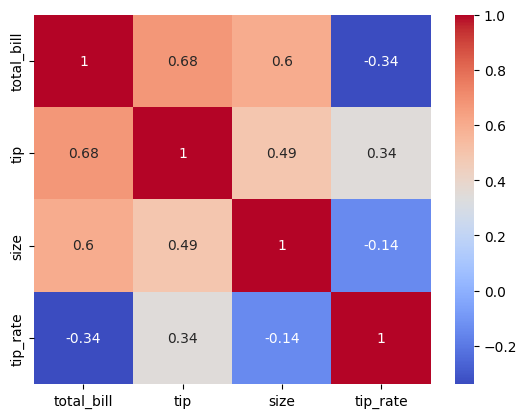

In [12]:
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=True)

### 連関(association)
* 連関の特徴
  * カテゴリ変数間の相関関係を表す
  * 分割表(contingency table)を用いて計算する
  * 分割表内の数字を観測度数(observed frequency)という
  * 期待度数：連関がないと想定した場合の度数
* 分割表の算出
  * pd.crosstab(xarray, yarray)  (xarray: indexになる、yarray: columnになる)

In [15]:
pd.crosstab(df["sex"], df["time"])

time,Lunch,Dinner
sex,,
Male,33,124
Female,35,52


### カイ二乗
* カイ二乗の特徴
  * 観測度数が期待度数からどれくらい離れているかを計算した値
  * {(観測度数 - 期待度数)^2 / 期待度数}の総和
* カイ二乗と期待度数の算出
  * stats.chi2_contingency(cont_table, correction=False)
    * 第1戻り値：カイ二乗
    * 第4戻り値：期待度数

In [16]:
cont_table = pd.crosstab(df["sex"], df["time"])
stats.chi2_contingency(cont_table, correction=False)

Chi2ContingencyResult(statistic=10.277251918677742, pvalue=0.0013468039268008766, dof=1, expected_freq=array([[ 43.75409836, 113.24590164],
       [ 24.24590164,  62.75409836]]))

### クラメールの連関係数
* クラメールの連関係数の特徴
  * 連関の強さを表す指標
  * カイ2乗の値を**0〜1**に標準化した値

In [26]:
cont_table = pd.crosstab(df["sex"], df["time"])
chi2, p, dof, expected = stats.chi2_contingency(cont_table, correction=False)
n = len(df["sex"])
# クラメールの連関係数を計算
cramer_v = np.sqrt(chi2 / (n * (min(cont_table.shape) - 1)))
cramer_v

0.20523129613344476

In [27]:
# 関数化
def get_cramer_v(low: np.array, index: np.array):
    cont_table = pd.crosstab(low, index)
    chi2, p, dof, expected = stats.chi2_contingency(cont_table, correction=False)
    n = len(index)
    # クラメールの連関係数を計算
    cramer_v = np.sqrt(chi2 / (n * (min(cont_table.shape) - 1)))
    return cramer_v


get_cramer_v(df["sex"], df["time"])

0.20523129613344476

# 確率
ある試行を同じ条件で何度も繰り返した時に、ある事象が起こる相対頻度の極限値

## 確率変数(random variable)
* 値が確率的に変動する変数
* 通常Xで表す
* それぞれの値に確率P(X)が対応している

## 確率分布(probability distribution)
* 確率分布の特徴
  * 確率がどのように分布しているのかを表したもの
  * 確率変数は、**確率分布から生成された値**と考えるとわかりやすい
* Pythonで確率分布を扱う
  * stats.<確率分布>.<メソッド>

In [25]:
# 一様分布(整数)
# lowからhigh-1までのランダムな整数を生成, rvsはrandom variats(確率変量)の意味
# 確率変量は、確率変数が実際に取る値
stats.randint.rvs(1, 7)

4

In [13]:
# 一様分布(連続)
# locからloc+scaleまでのランダムな値を生成
stats.uniform.rvs(0, 1)

0.5037620274658665

In [24]:
# この書き方でも同じ
stats.uniform(0, 1).rvs()

0.7759089133001561

## 離散型確率変数と連続型確率変数
* 確率質量関数(PMF: Probability Mass Function): 離散型確率変数がとる確率を表した関数
  * y軸がそのまま確率を表す
* 確率密度関数(PDF: Probability Densty Function): 確率密度関数
  * y軸は相対的な起こりやすさを表す
  * "密度"という言葉を考えてみる
    * 例えば、人口密度であれば、面積をかければ人口が出てくる
    * 確率密度で言えば、横幅をかければ(積分したら)、確率が出てくる

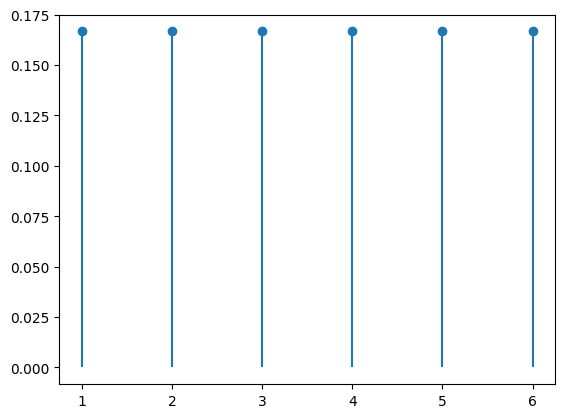

In [35]:
# 離散型
x = np.arange(1, 7)
y = stats.randint(1, 7).pmf(x)
plt.plot(x, y, "o")
plt.vlines(x, 0, y)

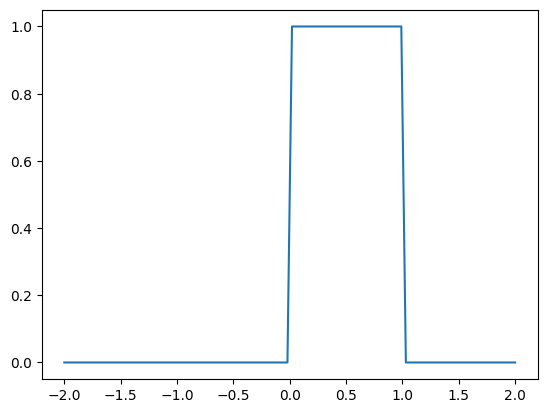

In [37]:
# 連続型
x = np.linspace(-2, 2, 100)
y = stats.uniform(loc=0, scale=1).pdf(x)
plt.plot(x, y)

## 累積分布関数(CDF: Cumulative Distribution Function)
* 累積分布関数の特徴
  * 確立密度関数を、負の無限大からある値(x)まで確率を積み上げた値を返す関数
  * 累積分布関数と確率密度関数は、微分と積分の関係になる
* 累積分布関数の算出
  * stat.<確率密度関数>.cdf(x)

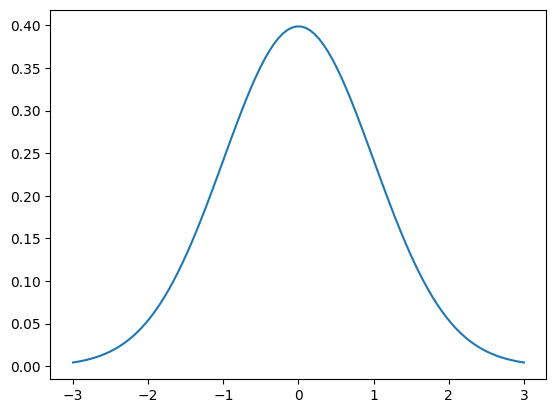

In [7]:
x = np.linspace(-3, 3, 100)
y = stats.norm.pdf(x)
plt.plot(x, y)

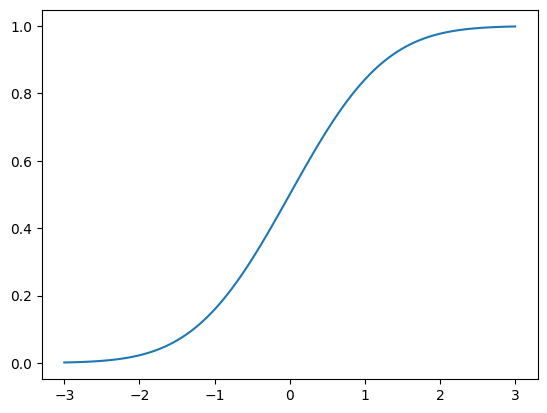

In [8]:
# xまでの左側の面積
y = stats.norm.cdf(x)
plt.plot(x, y)

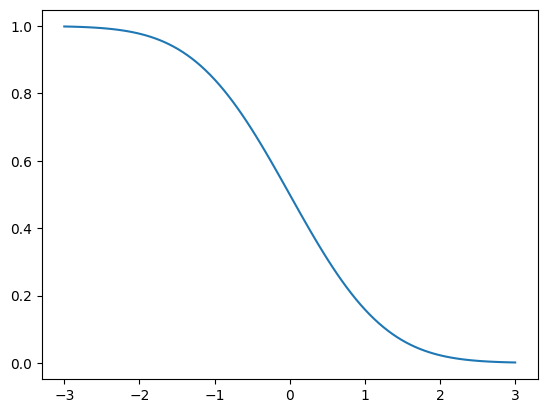

In [9]:
# 右側の面積を表す
# sf: Survival Function(1-CDF)
y = stats.norm.sf(x)
plt.plot(x, y)

## 正規分布(ガウス分布)
* 最もよく使われる分布
* 自然界の多くで見られる分布(身長、誤差、など)
* 統計学の理論でもよく出てくる分布
* 平均 $\mu$,分散 $\sigma^2$で形状が決まる $N(\mu,\sigma^2)$

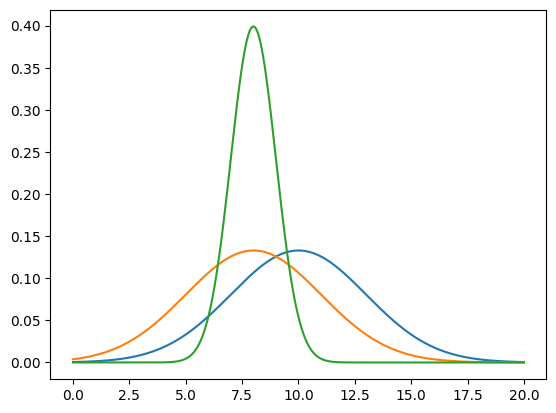

In [15]:
x = np.linspace(0, 20, 1000)
y = stats.norm(loc=10, scale=3).pdf(x)
y2 = stats.norm(loc=8, scale=3).pdf(x)
y3 = stats.norm(loc=8, scale=1).pdf(x)
plt.plot(x, y)
plt.plot(x, y2)
plt.plot(x, y3)

## カーネル密度推定(KDE: Kernel Density Estimation)
* KDEの特徴
  * 観測されたデータ(度数分布)から確率密度関数(確率分布)を推定する
* PythonでKDEを実施する
  * stats.gaussian_kde(dataset)

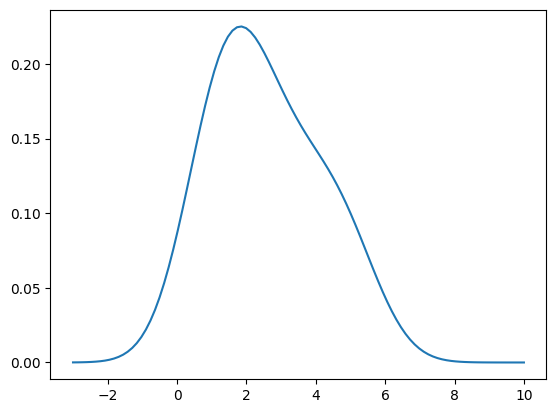

In [17]:
x = np.linspace(-3, 10, 100)
y = stats.gaussian_kde([1, 1, 2, 2, 3, 4, 5]).pdf(x)
plt.plot(x, y)

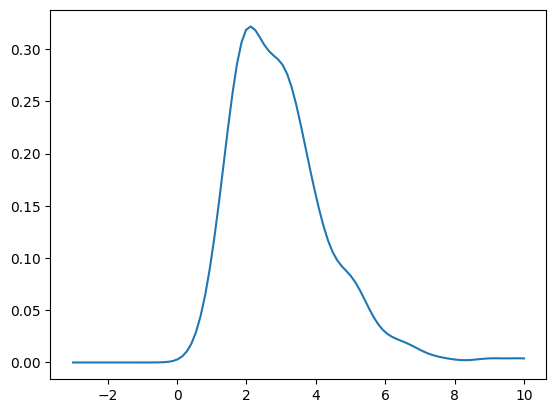

In [19]:
y = stats.gaussian_kde(df["tip"]).pdf(x)
plt.plot(x, y)

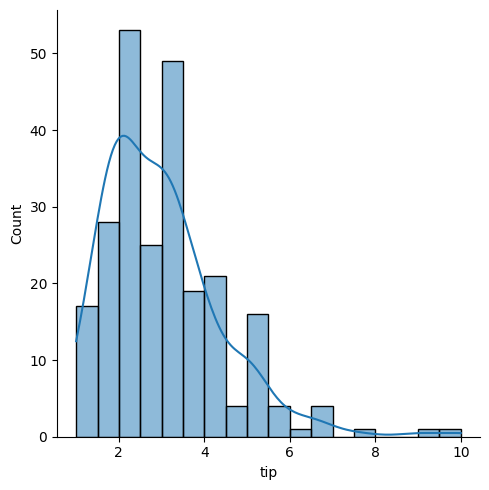

In [20]:
sns.displot(df["tip"], kde=True)

In [24]:
resample_data = stats.gaussian_kde(df["tip"]).resample()